___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
try:
    import jupyter_black

    jupyter_black.load()
except ImportError:
    pass

In [2]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
# Check python version
!python --version

Python 3.11.5


In [4]:
!pip install tensorflow

In [5]:
!pip install tensorflow keras

In [6]:
# Check tensorflow version
import tensorflow as tf

tf.__version__

'2.14.0'

In [7]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

CPU will be used for this session


In [8]:
# Get more information about the GPU
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

In [9]:
import numpy as np # Import NumPy for numerical operations
import pandas as pd # Import Pandas for data manipulation and analysis
import matplotlib.pyplot as plt # Import Matplotlib for data visualization
import seaborn as sns # Import Seaborn for enhanced data visualization
from tensorflow import keras # Import Keras from TensorFlow for deep learning
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder for one-hot encoding categorical variables
from sklearn.compose import make_column_transformer # Import make_column_transformer for column transformations
from sklearn.preprocessing import StandardScaler # Import StandardScaler from scikit-learn for feature scaling
from sklearn.model_selection import train_test_split # Import train_test_split for splitting the dataset
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping for early stopping during model training
from sklearn.metrics import confusion_matrix, classification_report # Import confusion_matrix and classification_report for model evaluation
from tensorflow.keras.models import Sequential # Import Sequential, Input, Dense, and Activation from Keras for building neural networks
from tensorflow.keras.layers import Input, Dense, Activation
from keras.optimizers import Adam # Import the Adam optimizer from Keras for gradient-based optimization
from keras.layers import Dropout
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
from tensorflow.keras.models import load_model
import pickle
# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [10]:
df = pd.read_csv("1-Churn_Modelling.csv") #read data

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.isnull().sum().any() #check null values summation.

False

In [14]:
df.duplicated().sum().any() #check for any duplicates

False

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [16]:
df.describe(include="O").T #categorical var.

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [17]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1) #drop unnecessary features

In [18]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [19]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [20]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

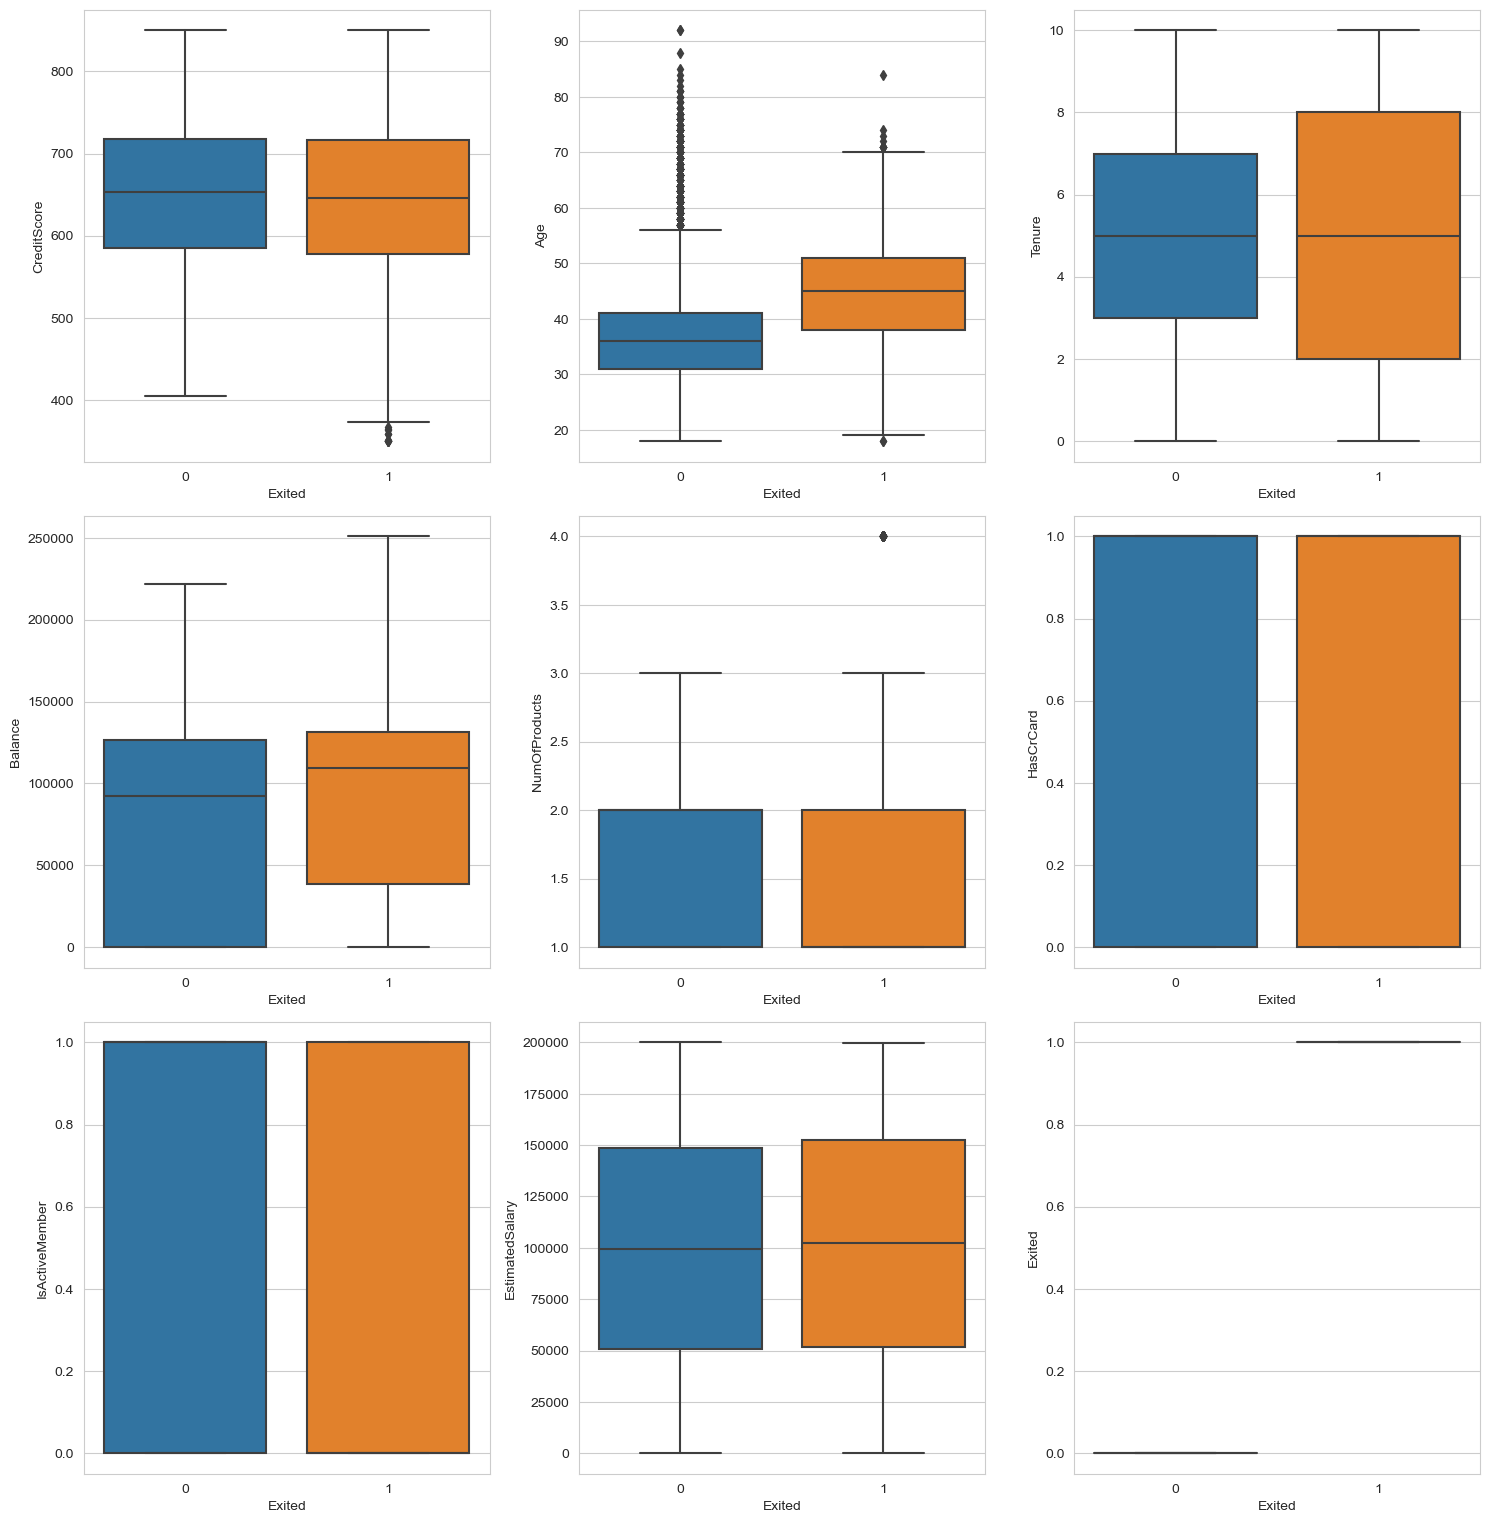

In [21]:
# Here we could see the most distinguishing features and potential outliers
fig = plt.figure(figsize=(15,20))

for i, col in enumerate(df.select_dtypes(include=np.number)):
        plt.subplot(4,3,i+1)
        ax = sns.boxplot(x="Exited", y=df[col], data=df)

plt.tight_layout();

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


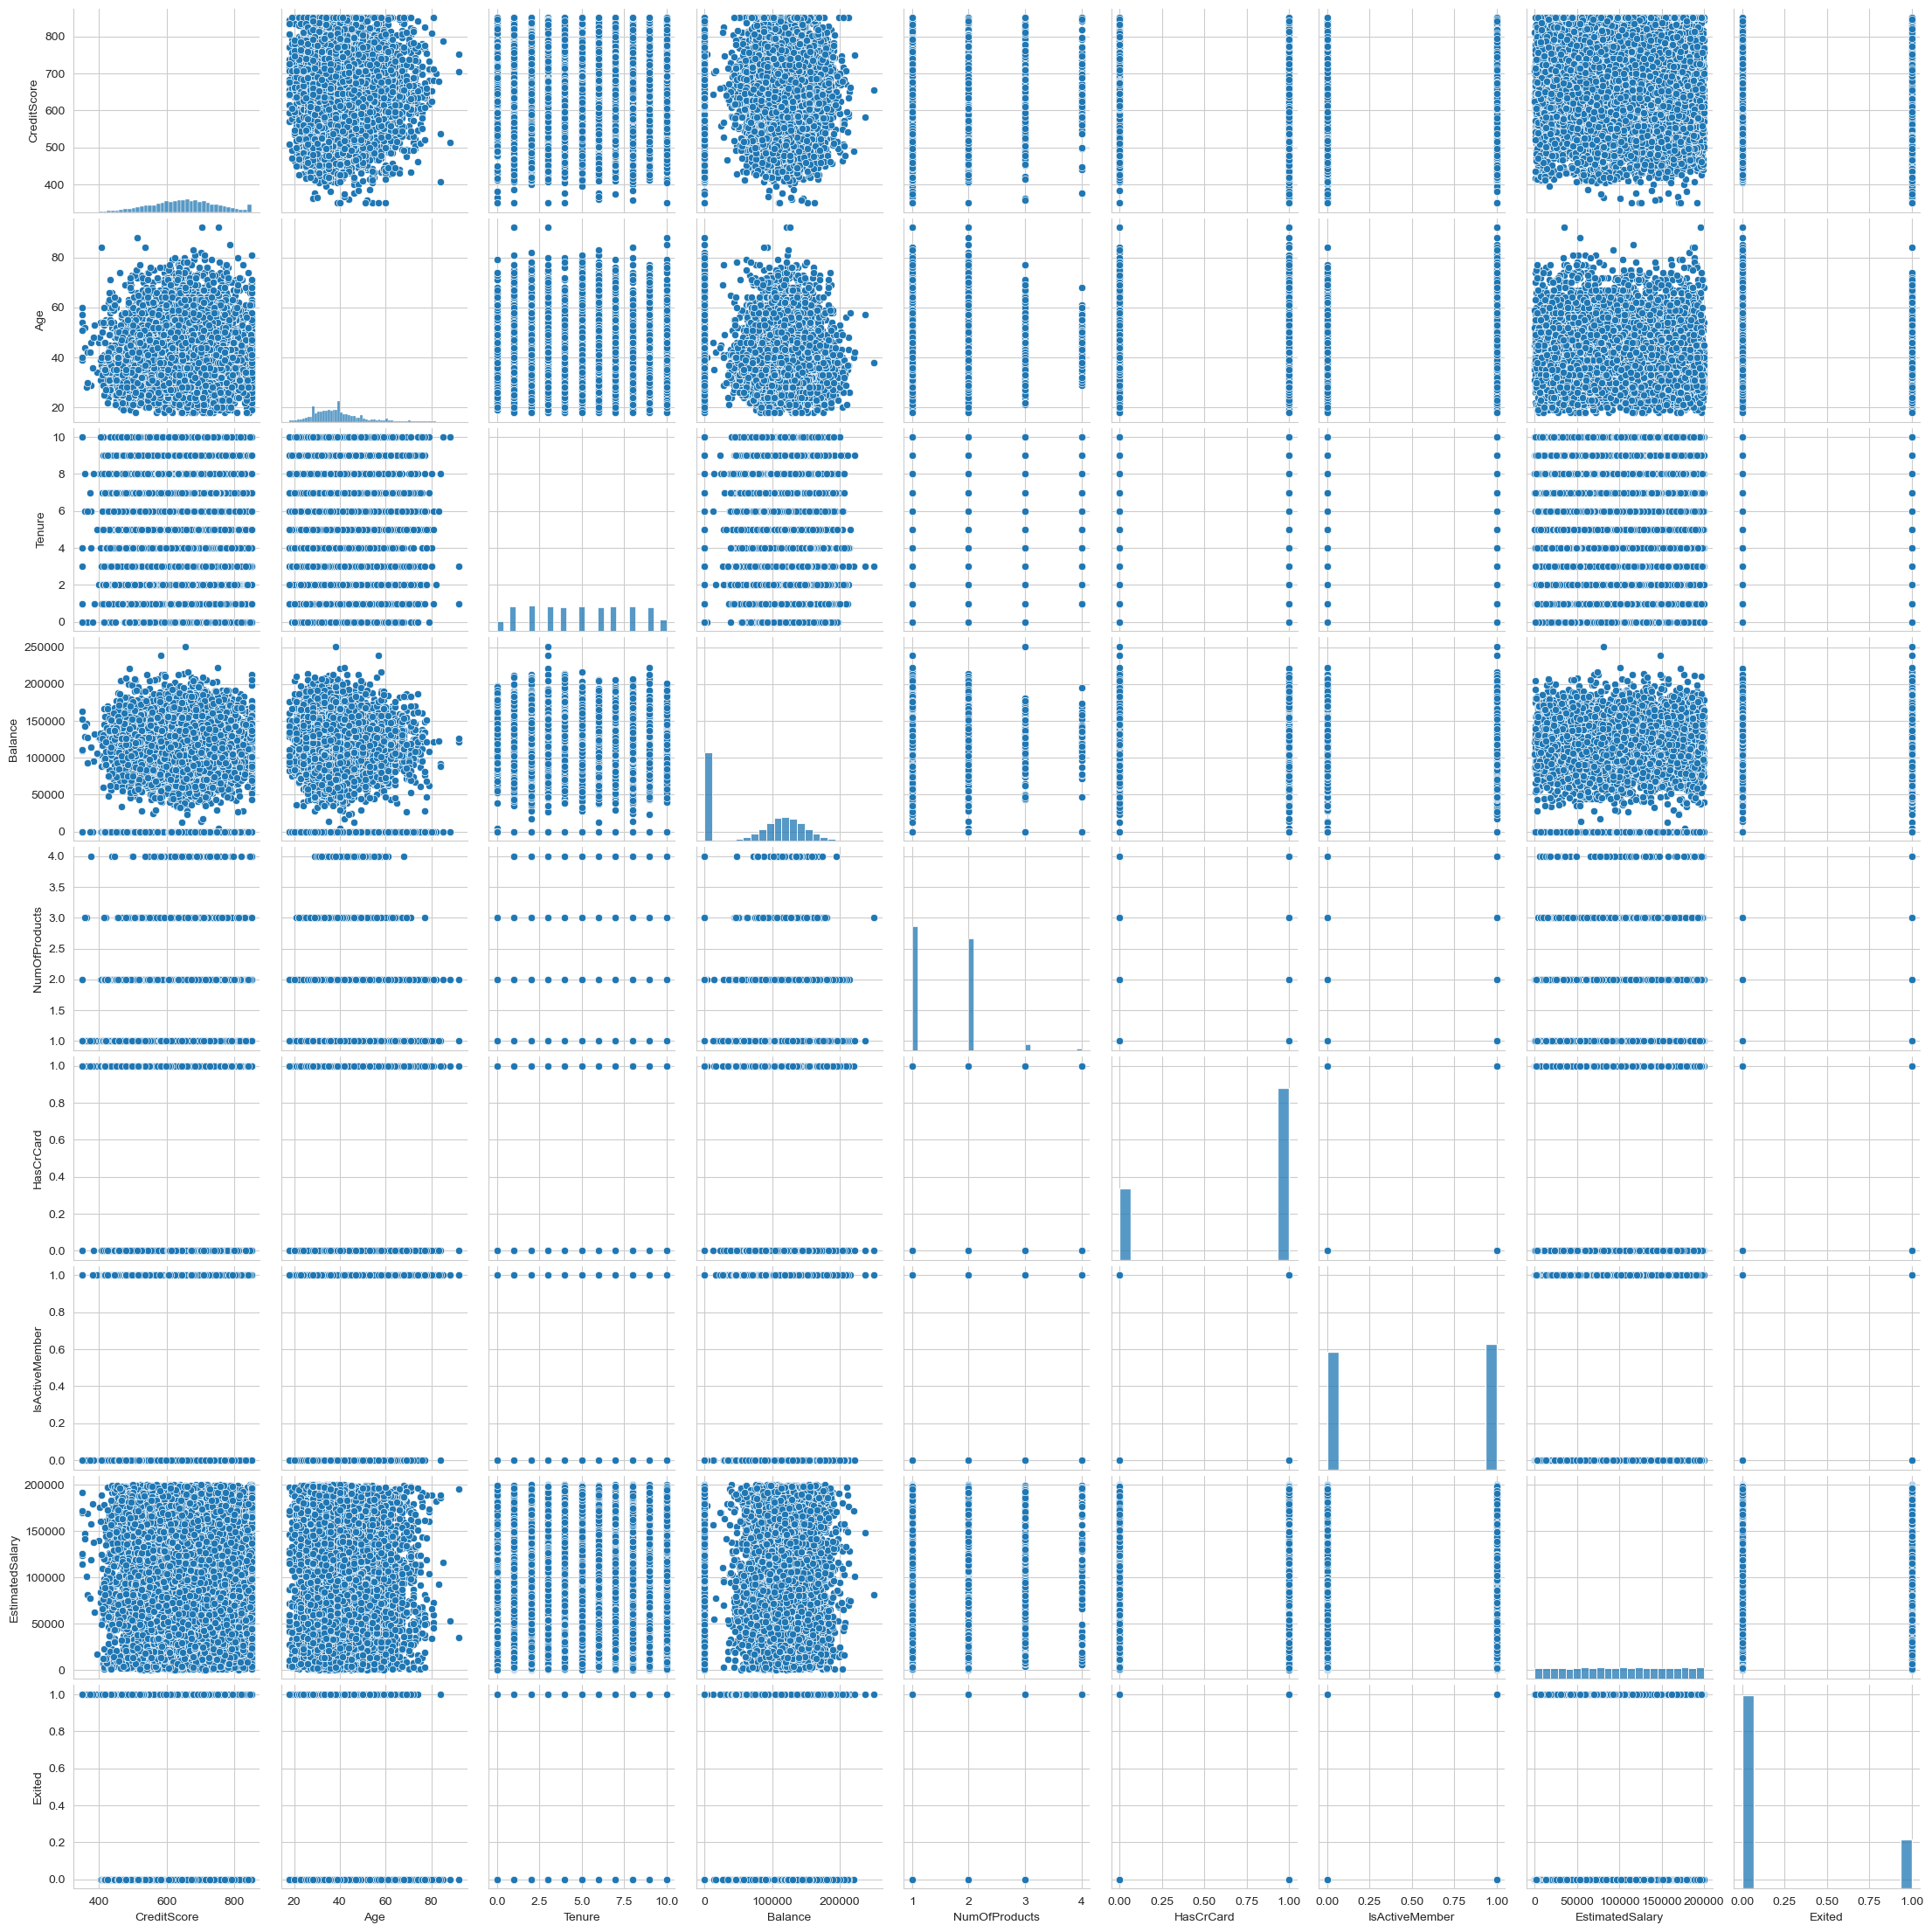

In [22]:
sns.pairplot(df)
plt.show()

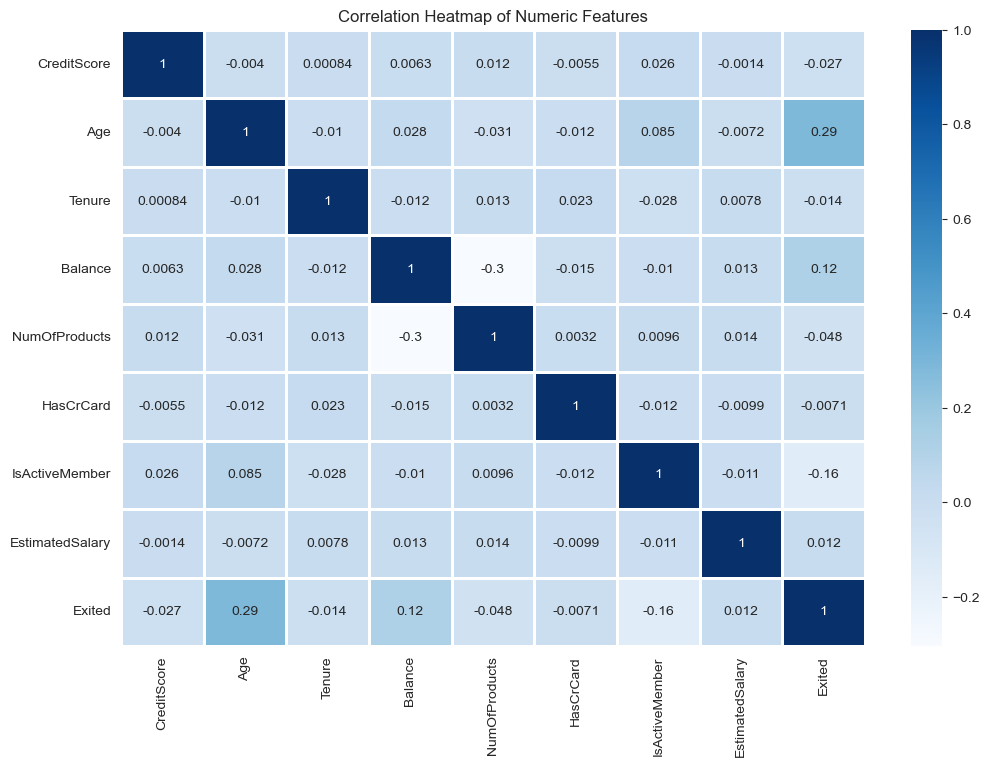

In [23]:
numeric_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=True,linewidth =2 , cmap="Blues")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [24]:
encoder = OneHotEncoder() #Encoding for categorical var
columns_to_encode = ['Geography', 'Gender'] 

In [25]:
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_to_encode])

C:\Users\sarah\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [28]:
df.drop(columns_to_encode, axis=1, inplace=True)
df[encoded_column_names] = encoded_columns

In [29]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1.000,0.000,0.000,1.000,0.000
1,608,41,1,83807.860,1,0,1,112542.580,0,0.000,0.000,1.000,1.000,0.000
2,502,42,8,159660.800,3,1,0,113931.570,1,1.000,0.000,0.000,1.000,0.000
3,699,39,1,0.000,2,0,0,93826.630,0,1.000,0.000,0.000,1.000,0.000
4,850,43,2,125510.820,1,1,1,79084.100,0,0.000,0.000,1.000,1.000,0.000


In [30]:
X = df.drop("Exited", axis =1)
y = df["Exited"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42) #split data

In [32]:
scaler = StandardScaler() #scaling
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train.shape

(7000, 13)

In [34]:
X_test.shape

(3000, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [35]:
# First way to create the model using the Sequential API
# Create a Sequential model, which is a linear stack of layers.
model = Sequential(
    [
        # Input layer with a shape matching the number of features in the training data.
        Input(shape=X_train.shape[1]),
        
        # First hidden layer with 6 units and ReLU activation function.
        Dense(units=6, activation="relu"),
        
        # Second hidden layer with 6 units and ReLU activation function.
        Dense(units=6, activation="relu"),
        
        # Third hidden layer with 6 units and ReLU activation function.
        Dense(units=6, activation="relu"),
        
        # Output layer with 1 unit and a sigmoid activation function, suitable for binary classification.
        Dense(units=1, activation='sigmoid'),
    ]
)


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 175 (700.00 Byte)
Trainable params: 175 (700.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 6) dtype=float32, numpy=
 array([[ 0.3495835 , -0.12273771, -0.39247093, -0.22587177,  0.04515624,
         -0.5059358 ],
        [-0.31823117,  0.3641914 , -0.4267413 , -0.47910687,  0.43547213,
          0.45509773],
        [-0.275256  , -0.23947954,  0.05491734,  0.3542207 ,  0.38377964,
          0.23777813],
        [ 0.47321302, -0.4921936 ,  0.5215513 , -0.31985772,  0.28631818,
         -0.03142428],
        [-0.34245485,  0.507919  ,  0.33107692,  0.208965  ,  0.4658913 ,
          0.4907021 ],
        [-0.32434106,  0.44087   , -0.36022776,  0.37099695,  0.26059312,
         -0.26982996],
        [ 0.500853  , -0.01363832,  0.01992989,  0.31909895, -0.19827545,
          0.21636337],
        [-0.22227174,  0.26433396,  0.13479841, -0.26364505,  0.35140818,
         -0.02675426],
        [-0.31331027,  0.4505046 , -0.43583372,  0.35505563, -0.42916995,
         -0.14249206],
        [-0.22664538, -0.38959146, -0.29466203,  0.30821216,

In [38]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics='accuracy') 

In [39]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=100, restore_best_weights=True) #early stopping

In [40]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=128 ,epochs=1000 ,callbacks=[early_stop])

Epoch 1/1000
47/47 [==============================] - 3s 14ms/step - loss: 0.7101 - accuracy: 0.4585 - val_loss: 0.6578 - val_accuracy: 0.6848
Epoch 2/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.6181 - accuracy: 0.7561 - val_loss: 0.5655 - val_accuracy: 0.7981
Epoch 3/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.5405 - accuracy: 0.7914 - val_loss: 0.5001 - val_accuracy: 0.7981
Epoch 4/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.5000 - accuracy: 0.7914 - val_loss: 0.4699 - val_accuracy: 0.7981
Epoch 5/1000
47/47 [==============================] - 0s 7ms/step - loss: 0.4817 - accuracy: 0.7914 - val_loss: 0.4541 - val_accuracy: 0.7981
Epoch 6/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.4704 - accuracy: 0.7914 - val_loss: 0.4444 - val_accuracy: 0.7981
Epoch 7/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.4622 - accuracy: 0.7916 - val_loss: 0.4373 - val_accuracy: 0.7990
Epoch

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 175 (700.00 Byte)
Trainable params: 175 (700.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 6) dtype=float32, numpy=
 array([[ 0.05631511, -0.09151088, -0.10070466,  0.03976924, -0.08322792,
         -0.07423834],
        [-0.68530923,  0.20246348, -0.07035735, -0.502735  ,  1.0522302 ,
          0.7688488 ],
        [-0.02758173, -0.07841448, -0.05292162, -0.00442569, -0.05869769,
          0.16147195],
        [ 0.51908416, -0.39912182,  0.69105875, -0.16110423,  0.382589  ,
         -0.21351561],
        [-0.43777394,  1.1842107 ,  1.317392  ,  0.2450608 ,  0.25830066,
          0.46115917],
        [-0.04594456, -0.02252477,  0.05673931,  0.1193416 ,  0.05018342,
          0.18791872],
        [-0.0983334 , -0.2109369 ,  0.05302915,  0.202211  , -0.31470624,
          1.1167955 ],
        [ 0.06079534,  0.02771556,  0.08308755, -0.05162584,  0.11081299,
          0.03672005],
        [-0.25151834,  0.39489737, -0.5987989 ,  0.30373842, -0.3531728 ,
          0.184411  ],
        [-0.10472133, -0.51752627, -0.04258818,  0.11439182,

In [43]:
# Note that the weights attribute is a python list type.
type(model.weights)

list

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

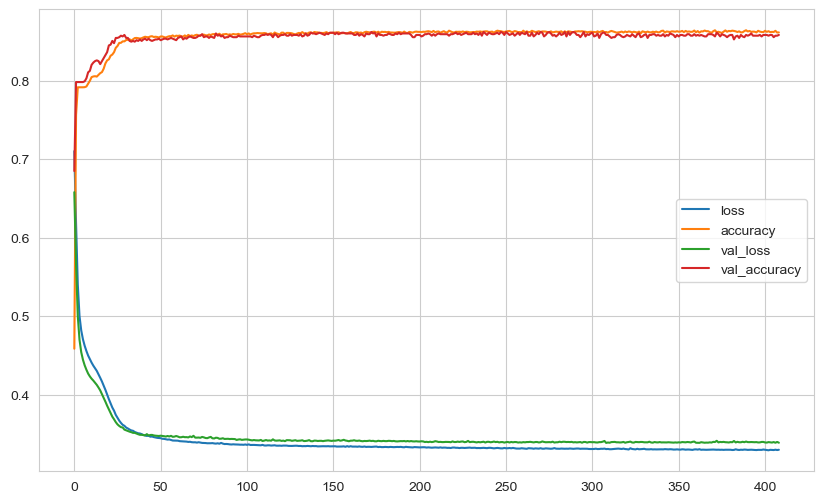

In [44]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 1.0)

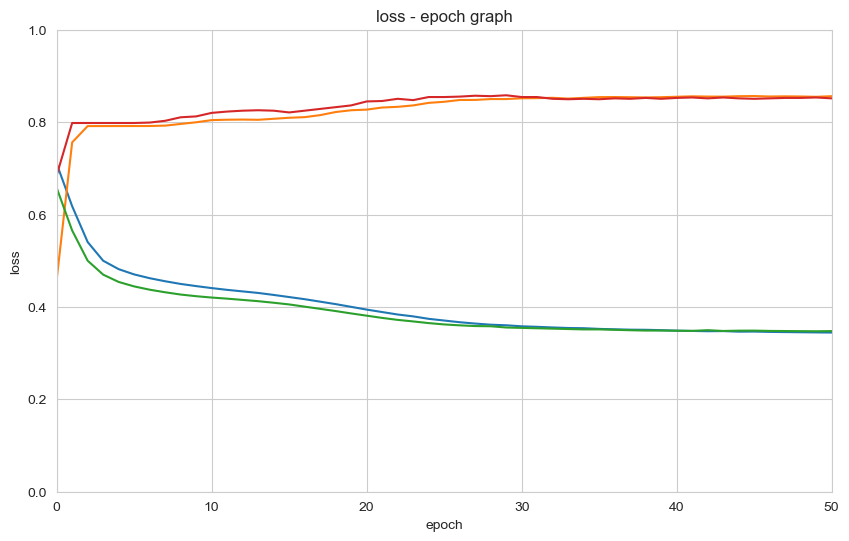

In [45]:
fig, ax = plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 50])  # focusing on the given x values
ax.set_ylim([0, 1])  # focusing on the given y values

In [46]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [47]:
y_pred= (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 2ms/step


In [48]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
3991,1,1
868,1,0
8591,0,0
8864,0,0
5938,0,0
2245,1,0
1502,0,0
8551,0,0
8850,1,1
6408,0,0


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.46      0.57       584

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



In [50]:
print(confusion_matrix(y_test, y_pred))

[[2324   92]
 [ 315  269]]


In [51]:
x_pred = model.predict(X_train)

219/219 [==============================] - 1s 3ms/step


In [52]:
x_pred= (model.predict(X_train) > 0.5).astype("int32")

219/219 [==============================] - 1s 3ms/step


In [53]:
print(classification_report(y_train,x_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5547
           1       0.76      0.49      0.59      1453

    accuracy                           0.86      7000
   macro avg       0.82      0.72      0.75      7000
weighted avg       0.85      0.86      0.85      7000



In [54]:
print(confusion_matrix(y_train , x_pred))

[[5327  220]
 [ 748  705]]


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [55]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [56]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / 7963) * (10000 / 2.0)
weight_for_1 = (1 / 2037) * (10000 / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


In [57]:
# Compile and train the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=128 ,epochs=1000 ,callbacks=[early_stop],class_weight=class_weight)

Epoch 1/1000
47/47 [==============================] - 1s 6ms/step - loss: 0.4798 - accuracy: 0.8329 - val_loss: 0.4592 - val_accuracy: 0.7895
Epoch 2/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.8124 - val_loss: 0.4244 - val_accuracy: 0.8067
Epoch 3/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8124 - val_loss: 0.4328 - val_accuracy: 0.8029
Epoch 4/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.8121 - val_loss: 0.4428 - val_accuracy: 0.7914
Epoch 5/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4509 - accuracy: 0.8074 - val_loss: 0.4420 - val_accuracy: 0.7876
Epoch 6/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.8086 - val_loss: 0.4501 - val_accuracy: 0.7829
Epoch 7/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.8055 - val_loss: 0.4408 - val_accuracy: 0.7876
Epoch 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

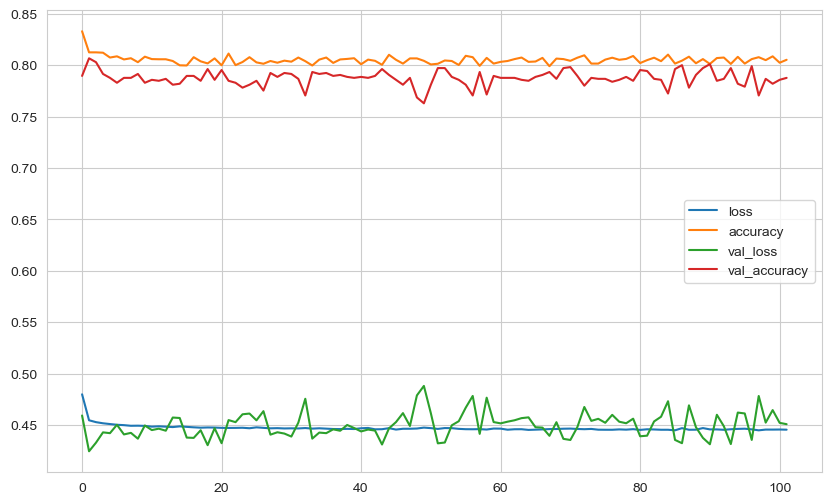

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [ ]:
loss, recall, val_loss, val_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", recall)
print("loss: ", val_loss)
print("accuracy: ", val_recall)

(0.0, 1.0)

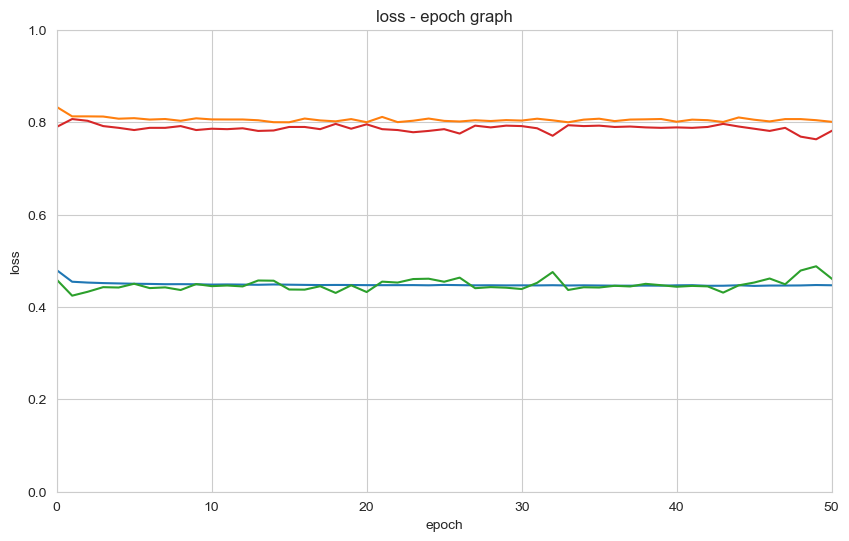

In [59]:
fig, ax = plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 50])  # focusing on the given x values
ax.set_ylim([0, 1])  # focusing on the given y values

In [60]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [61]:
y_pred= (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 1ms/step


In [62]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
9791,1,1
8517,0,0
411,0,0
9039,0,0
3146,1,0
1057,1,1
6603,0,0
7886,0,0
267,0,0
9574,0,0


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2416
           1       0.51      0.72      0.59       584

    accuracy                           0.81      3000
   macro avg       0.71      0.77      0.73      3000
weighted avg       0.84      0.81      0.82      3000



In [64]:
print(confusion_matrix(y_test, y_pred))

[[2005  411]
 [ 164  420]]


In [65]:
x_pred = model.predict(X_train)

219/219 [==============================] - 0s 1ms/step


In [66]:
x_pred= (model.predict(X_train) > 0.5).astype("int32")

219/219 [==============================] - 0s 1ms/step


In [67]:
print(classification_report(y_train,x_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5547
           1       0.55      0.74      0.63      1453

    accuracy                           0.82      7000
   macro avg       0.74      0.79      0.75      7000
weighted avg       0.85      0.82      0.83      7000



In [68]:
print(confusion_matrix(y_train , x_pred))

[[4664  883]
 [ 385 1068]]


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [69]:
# Create a Sequential model, which is a linear stack of layers.
model = Sequential(
    [
        # Input layer with a shape matching the number of features in the training data.
        Input(shape=X_train.shape[1]),
        
        # First hidden layer with 6 units and ReLU activation function.
        Dense(units=6, activation="relu"),
        
        # Second hidden layer with 6 units and ReLU activation function.
        Dense(units=6, activation="relu"),
        
        # Third hidden layer with 6 units and ReLU activation function.
        Dense(units=6, activation="relu"),
        
        # Output layer with 1 unit and a sigmoid activation function, suitable for binary classification.
        Dense(units=1, activation='sigmoid'),
    ]
)

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / 7963) * (10000 / 2.0)
weight_for_1 = (1 / 2037) * (10000 / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


In [70]:
# Create an Adam optimizer with the new learning rate =0.002
optimizer = Adam(learning_rate=0.002)

In [71]:
# Compile the model with the updated optimizer and train the model with class weights
model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics='Recall')
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=128 ,epochs=1000, class_weight=class_weight)

Epoch 1/1000
47/47 [==============================] - 1s 6ms/step - loss: 0.7143 - recall: 0.5616 - val_loss: 0.7108 - val_recall: 0.4953
Epoch 2/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.7017 - recall: 0.4609 - val_loss: 0.6979 - val_recall: 0.4245
Epoch 3/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6995 - recall: 0.5181 - val_loss: 0.6985 - val_recall: 0.5613
Epoch 4/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6972 - recall: 0.5278 - val_loss: 0.6908 - val_recall: 0.6085
Epoch 5/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6905 - recall: 0.6970 - val_loss: 0.6672 - val_recall: 0.6557
Epoch 6/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6616 - recall: 0.7091 - val_loss: 0.6153 - val_recall: 0.7311
Epoch 7/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6120 - recall: 0.7502 - val_loss: 0.5770 - val_recall: 0.7594
Epoch 8/1000
47/47 [==============

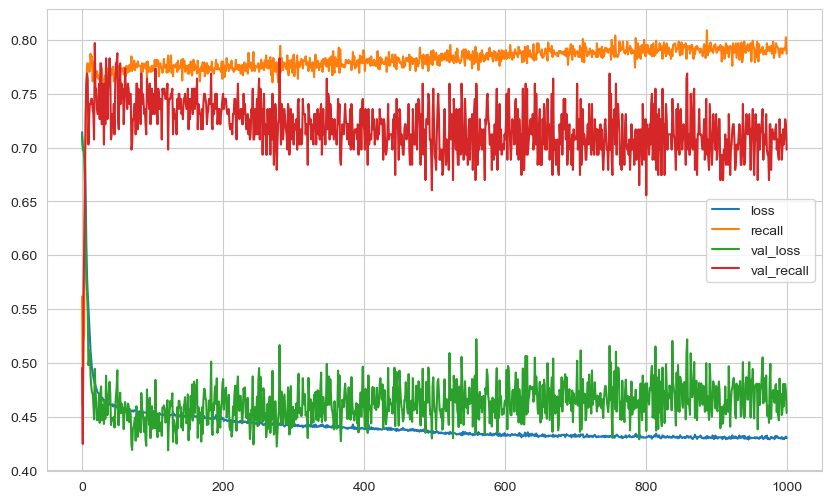

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [75]:
model.evaluate(X_test, y_test, verbose=0)

loss:  0.4512555003166199
reccall:  0.7277397513389587


(0.0, 1.0)

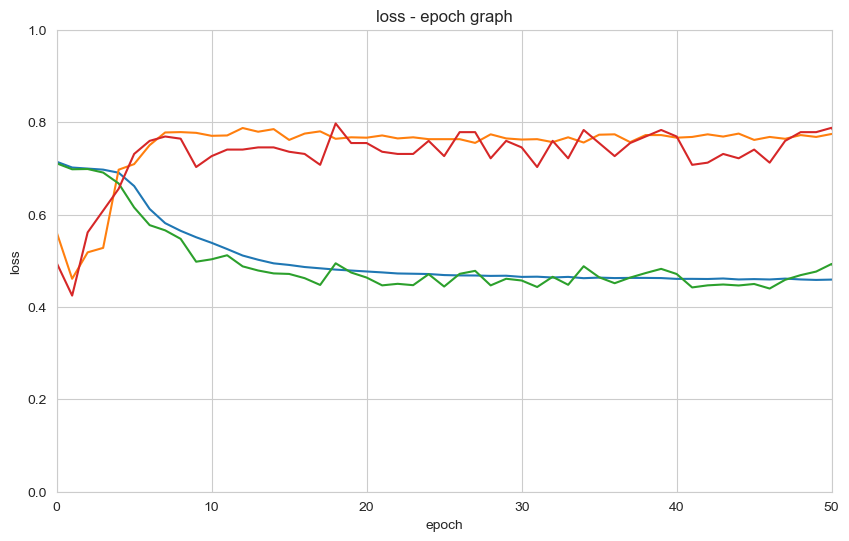

In [76]:
fig, ax = plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 50])  # focusing on the given x values
ax.set_ylim([0, 1])  # focusing on the given y values

In [77]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [78]:
y_pred= (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 1ms/step


In [79]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)


,Actual,Pred
5049,0,0
7854,0,0
108,0,0
613,0,0
5094,0,1
9703,0,0
7348,0,0
5547,1,0
8972,0,0
7699,0,0


In [80]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[1943  473]
 [ 159  425]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2416
           1       0.47      0.73      0.57       584

    accuracy                           0.79      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.84      0.79      0.80      3000



In [81]:
x_pred = model.predict(X_train)

219/219 [==============================] - 0s 985us/step


In [82]:
x_pred = (model.predict(X_train) > 0.5).astype("int32")

219/219 [==============================] - 0s 1ms/step


In [83]:
print(confusion_matrix(y_train , x_pred))
print(classification_report(y_train,x_pred))

[[4556  991]
 [ 336 1117]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5547
           1       0.53      0.77      0.63      1453

    accuracy                           0.81      7000
   macro avg       0.73      0.80      0.75      7000
weighted avg       0.85      0.81      0.82      7000



### Add Dropout Layer

In [249]:
model_Drop = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(units=6, activation="relu"),
    Dropout(0.5),  # Add a dropout layer after the first dense layer
    Dense(units=6, activation="relu"),
    Dropout(0.5),  # Add a dropout layer after the second dense layer
    Dense(units=6, activation="relu"),
    Dropout(0.5),  # Add a dropout layer after the third dense layer
    Dense(units=1, activation='sigmoid')
])


# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / 7963) * (10000 / 2.0)
weight_for_1 = (1 / 2037) * (10000 / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


In [250]:
optimizer = Adam(learning_rate=0.002)
model_Drop.compile(optimizer= optimizer, loss='binary_crossentropy', metrics='Recall') # Compile the model with the updated optimizer and train the model with class weights
model_Drop.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=128 ,epochs=1000, class_weight=class_weight)

Epoch 1/1000
47/47 [==============================] - 2s 12ms/step - loss: 0.7512 - recall: 0.7623 - val_loss: 0.7066 - val_recall: 0.8208
Epoch 2/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.7153 - recall: 0.8558 - val_loss: 0.7044 - val_recall: 0.9670
Epoch 3/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.7064 - recall: 0.8912 - val_loss: 0.7027 - val_recall: 0.9858
Epoch 4/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.6998 - recall: 0.8928 - val_loss: 0.6966 - val_recall: 0.9575
Epoch 5/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.6979 - recall: 0.8638 - val_loss: 0.6973 - val_recall: 0.9481
Epoch 6/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.6964 - recall: 0.8695 - val_loss: 0.6939 - val_recall: 0.8208
Epoch 7/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.6961 - recall: 0.8662 - val_loss: 0.6978 - val_recall: 0.9009
Epoch 8/1000
47/47 [=============

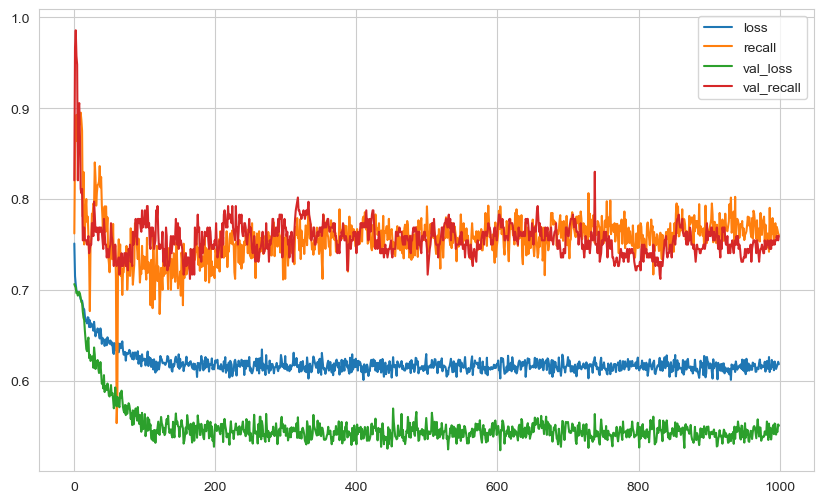

In [251]:
loss_df = pd.DataFrame(model_Drop.history.history)
loss_df.plot()
plt.show()

In [252]:
model_Drop.evaluate(X_test, y_test, verbose=0)

[0.558866560459137, 0.7722602486610413]

(0.0, 1.0)

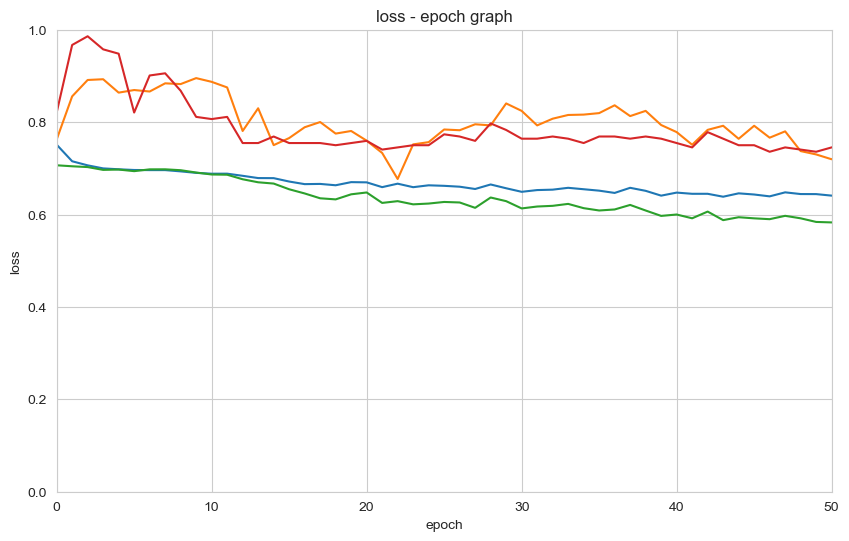

In [253]:
fig, ax = plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 50])  # focusing on the given x values
ax.set_ylim([0, 1])  # focusing on the given y values

In [254]:
y_pred = model_Drop.predict(X_test)

94/94 [==============================] - 0s 3ms/step


In [255]:
y_pred= (model_Drop.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 3ms/step


In [256]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
8192,0,0
4196,1,1
6688,0,0
8836,0,0
4822,1,1
9541,0,0
8285,0,0
617,1,1
8072,1,1
1962,1,1


In [257]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[1714  702]
 [ 133  451]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.80      2416
           1       0.39      0.77      0.52       584

    accuracy                           0.72      3000
   macro avg       0.66      0.74      0.66      3000
weighted avg       0.82      0.72      0.75      3000



In [258]:
x_pred = model_Drop.predict(X_train)

219/219 [==============================] - 1s 2ms/step


In [259]:
x_pred= (model_Drop.predict(X_train) > 0.5).astype("int32")

219/219 [==============================] - 1s 2ms/step


In [260]:
print(confusion_matrix(y_train , x_pred))
print(classification_report(y_train,x_pred))

[[3998 1549]
 [ 294 1159]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      5547
           1       0.43      0.80      0.56      1453

    accuracy                           0.74      7000
   macro avg       0.68      0.76      0.68      7000
weighted avg       0.83      0.74      0.76      7000



### Add Early Stop

In [261]:
model_val_loss = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(units=6, activation="relu"),
    Dense(units=6, activation="relu"),
    Dense(units=6, activation="relu"),
    Dense(units=1, activation='sigmoid')
])

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / 7963) * (10000 / 2.0)
weight_for_1 = (1 / 2037) * (10000 / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


In [262]:
optimizer = Adam(learning_rate=0.002)
# Compile the model with the updated optimizer and train the model with class weights
model_val_loss.compile(optimizer= optimizer, loss='binary_crossentropy', metrics='Recall')

#### Monitor the "val_loss" as metric

In [263]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=100, restore_best_weights=True) #early stopping, monitor = val loss

In [264]:
model_val_loss.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=128 ,epochs=1000, callbacks=[early_stop], class_weight=class_weight)

Epoch 1/1000
47/47 [==============================] - 2s 12ms/step - loss: 0.6920 - recall: 0.5697 - val_loss: 0.7013 - val_recall: 0.7358
Epoch 2/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.6634 - recall: 0.7075 - val_loss: 0.6654 - val_recall: 0.6509
Epoch 3/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.6304 - recall: 0.6600 - val_loss: 0.6335 - val_recall: 0.6274
Epoch 4/1000
47/47 [==============================] - 0s 8ms/step - loss: 0.6088 - recall: 0.6398 - val_loss: 0.5927 - val_recall: 0.5802
Epoch 5/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.5974 - recall: 0.6454 - val_loss: 0.5879 - val_recall: 0.5896
Epoch 6/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.5912 - recall: 0.6350 - val_loss: 0.5827 - val_recall: 0.6038
Epoch 7/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.5871 - recall: 0.6527 - val_loss: 0.5609 - val_recall: 0.5991
Epoch 8/1000
47/47 [=============

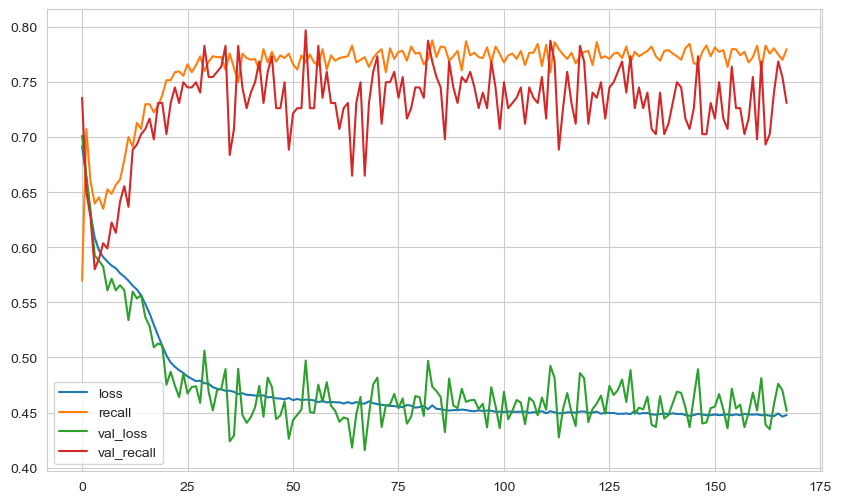

In [265]:
loss_df = pd.DataFrame(model_val_loss.history.history)
loss_df.plot()
plt.show()

In [266]:
model_val_loss.evaluate(X_test, y_test, verbose=0)

[0.4224115312099457, 0.698630154132843]

(0.0, 1.0)

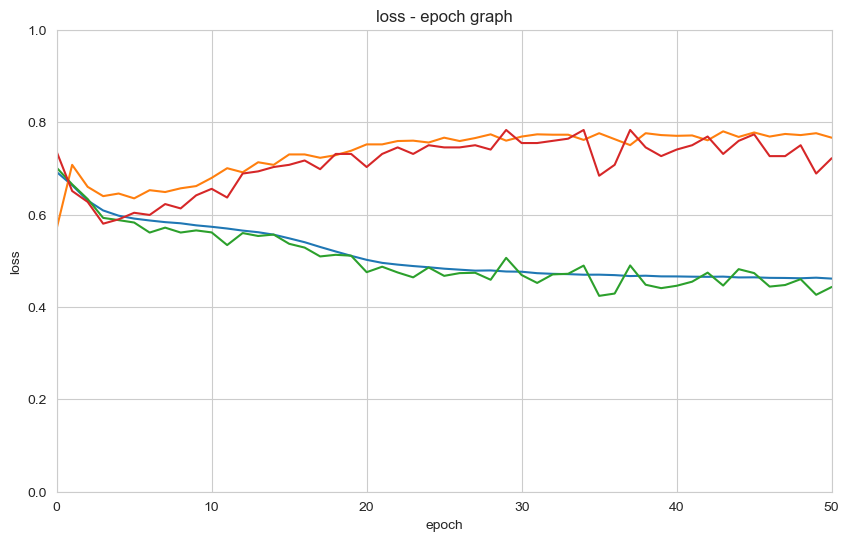

In [267]:
fig, ax = plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 50])  # focusing on the given x values
ax.set_ylim([0, 1])  # focusing on the given y values


In [268]:
y_pred = model_val_loss.predict(X_test)
y_pred= (model_val_loss.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 2ms/step


In [269]:
y_pred= (model_val_loss.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 2ms/step


In [270]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
9766,0,1
8463,1,1
6323,0,0
485,0,0
1201,1,1
2304,0,0
6879,0,0
9966,0,0
1372,0,0
8267,0,0


In [271]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[2021  395]
 [ 176  408]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2416
           1       0.51      0.70      0.59       584

    accuracy                           0.81      3000
   macro avg       0.71      0.77      0.73      3000
weighted avg       0.84      0.81      0.82      3000



In [272]:
x_pred = model_val_loss.predict(X_train)

219/219 [==============================] - 1s 3ms/step


In [273]:
x_pred= (model_val_loss.predict(X_train) > 0.5).astype("int32")

219/219 [==============================] - 1s 5ms/step


In [274]:
print(confusion_matrix(y_train , x_pred))
print(classification_report(y_train,x_pred))

[[4648  899]
 [ 413 1040]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5547
           1       0.54      0.72      0.61      1453

    accuracy                           0.81      7000
   macro avg       0.73      0.78      0.74      7000
weighted avg       0.84      0.81      0.82      7000



#### Monitor the "val_recall" as metric

In [331]:
model_val_recall = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(units=6, activation="relu"),
    Dense(units=6, activation="relu"),
    Dense(units=6, activation="relu"),
    Dense(units=1, activation='sigmoid')
])

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / 7963) * (10000 / 2.0)
weight_for_1 = (1 / 2037) * (10000 / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


In [332]:
optimizer = Adam(learning_rate=0.004)
# Compile the model with the updated optimizer and train the model with class weights
model_val_recall.compile(optimizer= optimizer, loss='binary_crossentropy', metrics='Recall')

In [333]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience=100, restore_best_weights=True) #early stopping, monitor = val recall

In [334]:
model_val_recall.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=128 ,epochs=1000, callbacks=[early_stop], class_weight=class_weight)

Epoch 1/1000
47/47 [==============================] - 2s 11ms/step - loss: 0.6794 - recall: 0.5834 - val_loss: 0.6299 - val_recall: 0.6604
Epoch 2/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.6358 - recall: 0.6994 - val_loss: 0.5952 - val_recall: 0.7170
Epoch 3/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.6046 - recall: 0.7260 - val_loss: 0.5786 - val_recall: 0.6934
Epoch 4/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.5931 - recall: 0.7180 - val_loss: 0.5400 - val_recall: 0.6698
Epoch 5/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.5874 - recall: 0.7244 - val_loss: 0.5454 - val_recall: 0.6698
Epoch 6/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.5827 - recall: 0.7131 - val_loss: 0.5520 - val_recall: 0.6887
Epoch 7/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.5785 - recall: 0.7276 - val_loss: 0.5643 - val_recall: 0.7358
Epoch 8/1000
47/47 [=============

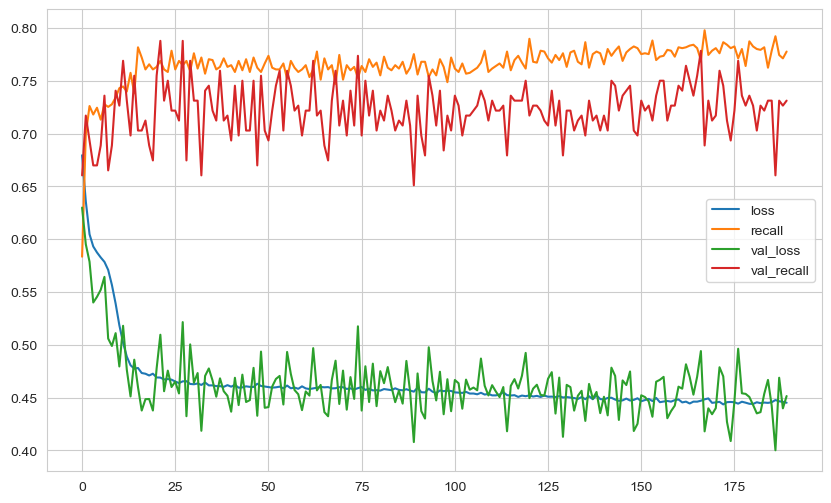

In [335]:
loss_df = pd.DataFrame(model_val_recall.history.history)
loss_df.plot()
plt.show()

(0.0, 1.0)

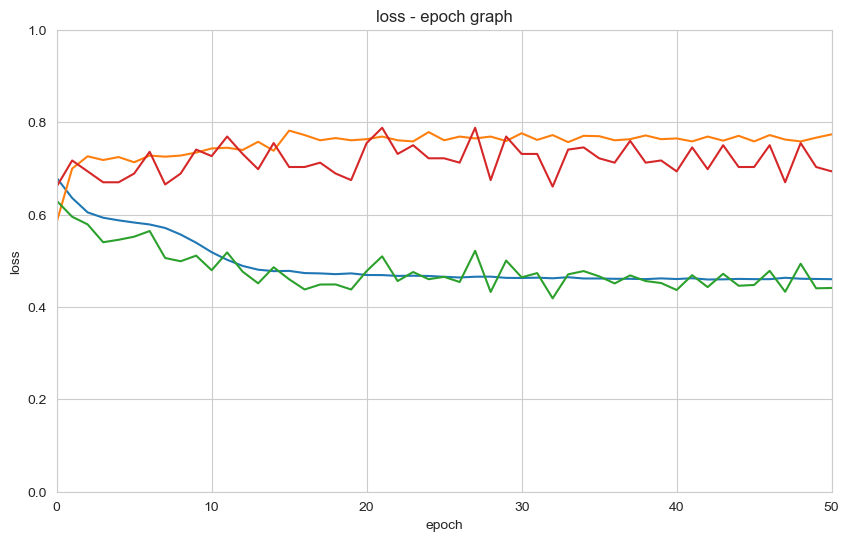

In [336]:
fig, ax = plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 50])  # focusing on the given x values
ax.set_ylim([0, 1])  # focusing on the given y values

In [337]:
model_val_recall.evaluate(X_test, y_test, verbose=0)

[0.40575355291366577, 0.6883561611175537]

In [338]:
y_pred = model_val_recall.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [339]:
y_pred= (model_val_recall.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 3ms/step


In [340]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
8699,0,0
9829,0,0
2534,0,1
6827,1,1
2526,0,0
8383,0,0
2650,0,0
809,0,0
4139,0,1
8894,0,1


In [341]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[2069  347]
 [ 182  402]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2416
           1       0.54      0.69      0.60       584

    accuracy                           0.82      3000
   macro avg       0.73      0.77      0.74      3000
weighted avg       0.84      0.82      0.83      3000



In [342]:
x_pred = model_val_recall.predict(X_train)

219/219 [==============================] - 1s 2ms/step


In [343]:
x_pred= (model_val_recall.predict(X_train) > 0.5).astype("int32")

219/219 [==============================] - 1s 3ms/step


In [344]:
print(confusion_matrix(y_train , x_pred))
print(classification_report(y_train,x_pred))

[[4776  771]
 [ 444 1009]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      5547
           1       0.57      0.69      0.62      1453

    accuracy                           0.83      7000
   macro avg       0.74      0.78      0.76      7000
weighted avg       0.84      0.83      0.83      7000



## Optuna

In [207]:
!pip install optuna

In [366]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [367]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [368]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 19:26:29,859] A new study created in memory with name: no-name-aa758c91-fb18-4290-b9b5-6a13b5248b14
C:\Users\sarah\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\sarah\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\sarah\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type 

Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 19:26:55,226] Trial 0 finished with value: 0.6284246444702148 and parameters: {'n_units1': 64, 'n_units2': 120, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0031626847974663202, 'w0': 1.378594508785357, 'w1': 4.524294733735666}. Best is trial 0 with value: 0.6284246444702148.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 19:27:18,310] Trial 1 finished with value: 0.9674657583236694 and parameters: {'n_units1': 78, 'n_units2': 36, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.03635628077204397, 'w0': 0.015064910642876638, 'w1': 0.554532073673987}. Best is trial 1 with value: 0.9674657583236694.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:27:30,664] Trial 2 finished with value: 0.2654109597206116 and parameters: {'n_units1': 99, 'n_units2': 102, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.000373349980393289, 'w0': 0.015176881216464766, 'w1': 0.1776675507986434}. Best is trial 1 with value: 0.9674657583236694.
[I 2023-10-30 19:28:35,593] Trial 3 finished with value: 0.3202054798603058 and parameters: {'n_units1': 47, 'n_units2': 27, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0006567083633539984, 'w0': 0.013501279699984787, 'w1': 0.02463567384795686}. Best is trial 1 with value: 0.9674657583236694.
[I 2023-10-30 19:29:42,988] Trial 4 finished with value: 0.10273972898721695 and parameters: {'n_units1': 57, 'n_units2': 19, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00010908654944949746, 'w0': 0.38001545864158576, 'w1': 0.10067738474187087}. Best is trial 1 with value: 0.9674657583236694.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 19:30:02,561] Trial 5 finished with value: 0.5616438388824463 and parameters: {'n_units1': 24, 'n_units2': 25, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0027508204122801837, 'w0': 1.7421272851171616, 'w1': 4.050293194070606}. Best is trial 1 with value: 0.9674657583236694.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-10-30 19:30:14,614] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 91, 'n_units2': 14, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00016199865163247254, 'w0': 0.162439588765781, 'w1': 0.01431714381971066}. Best is trial 1 with value: 0.9674657583236694.


Restoring model weights from the end of the best epoch: 34.
Epoch 49: early stopping


[I 2023-10-30 19:30:45,696] Trial 7 finished with value: 0.7722602486610413 and parameters: {'n_units1': 36, 'n_units2': 11, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0016220294344079966, 'w0': 0.012090161331525587, 'w1': 0.07068404970102307}. Best is trial 1 with value: 0.9674657583236694.
[I 2023-10-30 19:31:49,918] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 14, 'n_units2': 53, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0013030598012201105, 'w0': 0.26499004183371555, 'w1': 0.023108115679395014}. Best is trial 1 with value: 0.9674657583236694.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 19:32:03,666] Trial 9 finished with value: 0.8253424763679504 and parameters: {'n_units1': 59, 'n_units2': 52, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.008882999248887531, 'w0': 0.5151181297298218, 'w1': 4.2749936738817}. Best is trial 1 with value: 0.9674657583236694.


{'n_units1': 78,
 'n_units2': 36,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.03635628077204397,
 'w0': 0.015064910642876638,
 'w1': 0.554532073673987}

In [369]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model_optuna = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(units=6, activation="relu"),
    #Dropout(0.5),  # Add a dropout layer after the first dense layer
    Dense(units=6, activation="relu"),
    #Dropout(0.5),  # Add a dropout layer after the second dense layer
    Dense(units=6, activation="relu"),
    #Dropout(0.5),  # Add a dropout layer after the third dense layer
    Dense(units=1, activation='sigmoid')
])

opt = optimizer(learning_rate=lr)
model_optuna.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])


model_optuna.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
13/13 [==============================] - 1s 30ms/step - loss: 0.5257 - recall: 0.0000e+00 - val_loss: 0.4516 - val_recall: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4540 - recall: 0.0000e+00 - val_loss: 0.4333 - val_recall: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 0.4392 - recall: 0.0000e+00 - val_loss: 0.4335 - val_recall: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4306 - recall: 0.0000e+00 - val_loss: 0.4227 - val_recall: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 0.4240 - recall: 0.0405 - val_loss: 0.4214 - val_recall: 0.2014
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4192 - recall: 0.2055 - val_loss: 0.4119 - val_recall: 0.2569
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4153 - recall: 0.2567 - val_loss: 0.4087 - val_recall: 0.2778
Epoch 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [370]:
history = model_optuna.history.history

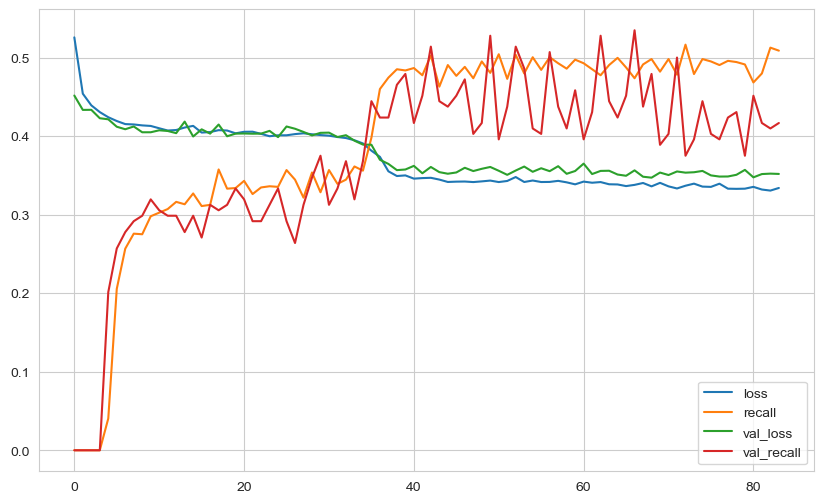

In [371]:
loss_df = pd.DataFrame(model_optuna.history.history)
loss_df.plot()
plt.show()

In [372]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[2315  101]
 [ 301  283]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.74      0.48      0.58       584

    accuracy                           0.87      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

94/94 [==============================] - 0s 2ms/step


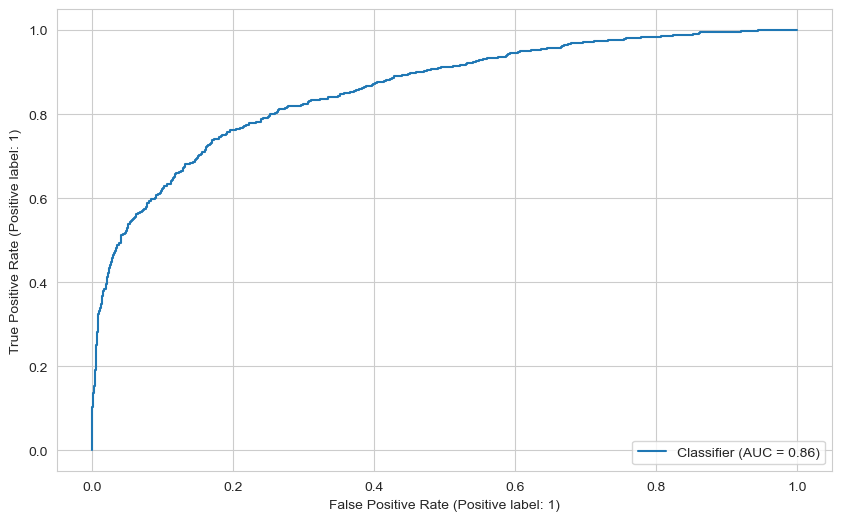

In [373]:
y_pred_proba = model_optuna.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [374]:
roc_auc_score(y_test, y_pred_proba)

0.8580503549396716

# Final Model and Model Deployment

In [375]:
pickle.dump(scaler, open("scaler_churn", "wb"))

<Axes: >

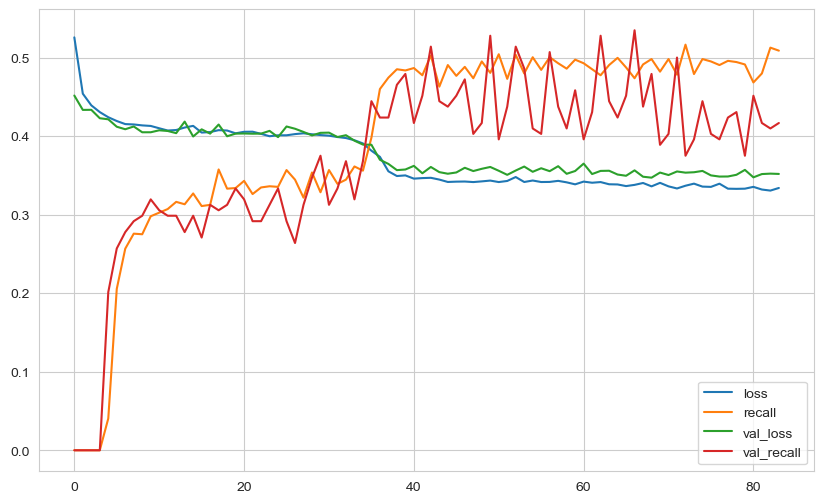

In [376]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [378]:
y_pred = model_optuna.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[2318   98]
 [ 287  297]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.75      0.51      0.61       584

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.77      3000
weighted avg       0.86      0.87      0.86      3000



In [379]:
model_optuna.save("model_Churn_prediction.h5")

C:\Users\sarah\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading Model and Scaler

In [380]:
model_churn = load_model("model_Churn_prediction.h5")
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [381]:
single_pre = df.drop("Exited", axis=1).iloc[2:3, :]
single_pre

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2,502,42,8,159660.800,3,1,0,113931.570,1.000,0.000,0.000,1.000,0.000


In [382]:
single_pre = scaler_churn.transform(single_pre)
single_pre

array([[-1.56048763,  0.29510101,  1.04494014,  1.33186432,  2.54267727,
         0.64598061, -1.03016917,  0.2273116 ,  0.99828718, -0.57559072,
        -0.57779016,  1.09823226, -1.09823226]])

In [383]:
(model_churn.predict(single_pre) > 0.5).astype("int32")

1/1 [==============================] - 0s 104ms/step


array([[1]])

In [384]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___